In [32]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [67]:
path = '/home/lorenzo/Principal/Doctorado/Noise-Neuron discriminator/Datos/'
data = pd.read_pickle(path + 'PCCIBNMZc')
data = data.drop(columns = ['Bulk'])
df = data.copy()

In [68]:
def Isi_pc(Isi_example,i):
    suma = np.sum(Isi_example)
    if suma == 0: return 0
    else:
        return np.sum(Isi_example[:i])/suma
i = 5
df['ISI_in_band_'+str((i+1)*10)+'Hz'] = data.ISI.apply(Isi_pc,args = (i,))

/home/lorenzo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


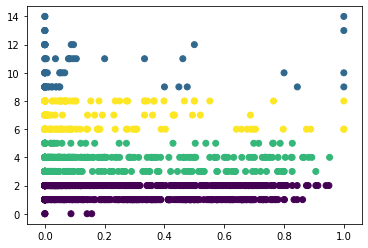

In [81]:
data_fit = df[['ISI_in_band_60Hz','ZeroCrossings']]
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_fit.values)
data_fit['label_pca'] = kmeans.labels_*5 + 1
color = ['r','b','k']
plt.scatter(data_fit.ISI_in_band_60Hz.values,y = data_fit.ZeroCrossings.values,c= data_fit.label_pca,cmap = 'viridis')

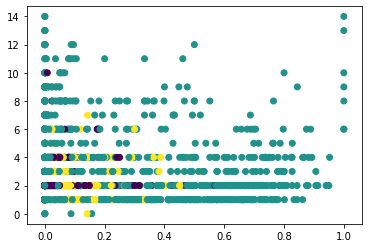

In [84]:
data_exp = df[['ISI_in_band_60Hz','ZeroCrossings','bNoise']]
#data_exp = data_exp[data_exp.bNoise != 1]
plt.scatter(data_exp.ISI_in_band_60Hz.values,y = data_exp.ZeroCrossings.values,c= data_exp.bNoise.values,cmap = 'viridis')

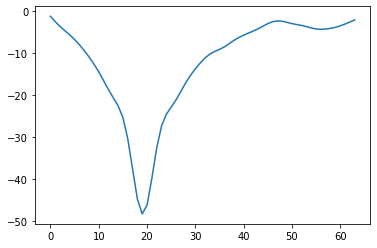

In [33]:
plt.plot(data[data.bNoise == 9].Mean.values[0])

In [66]:
data.to_pickle(path + 'PCCIBNMZc')

In [63]:
data = pd.read_pickle(path + 'PCCIBNMZc')


In [65]:
data.loc[data.bNoise == 9,'bNoise'] = 2

In [56]:
data.head()

,PatientExperiment,Channel,Cluster,ISI,bNoise,Mean,ZeroCrossings
0,HEC016\016context1\016context1,10,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[0.5116367582200496, 2.4461207483393506, 4.088...",12
1,HEC016\016context1\016context1,10,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[-0.5135433922453901, 1.9574568884484322, 4.12...",12
2,HEC016\016context1\016context1,1,1,"[0, 1, 2, 11, 3, 1, 4, 4, 1, 2, 0, 1, 1, 1, 0,...",2,"[2.9216277707523597, 3.690836498619311, 3.8667...",2
3,HEC016\016context1\016context1,1,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[5.549115009633331, 6.0470913803953605, 5.9916...",2
4,HEC016\016context1\016context1,11,1,"[0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,"[1.2227560764414591, 2.689021895373234, 4.1339...",10


In [76]:
data[(data.ZeroCrossings == 10)&(data.bNoise == 0)]

,PatientExperiment,Channel,Cluster,ISI,bNoise,Mean,ZeroCrossings
1514,HEC030\HEC030_rsvpscr9,66,2,"[0, 2, 3, 4, 9, 8, 8, 12, 28, 25, 8, 16, 15, 1...",0,"[-1.198806891708035, -2.1924916044751477, -3.8...",10
